In [488]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# 1 DATA ACQUISITION

In [489]:
df2 = pd.read_excel('OrdenesdecompraPORTAL1K.xlsx', decimal=',', thousands='.')


In [490]:
pd.options.display.max_columns = None
pd.options.display.float_format = '{:20,.2f}'.format

In [491]:
df2.columns

Index(['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

In [492]:
df2 = df2[['NÚMERO PEDIDO', 'ORDEN NÚMERO', 'FECHA ORDEN', 'FECHA ENTREGA',
       'FECHA APROBACION', 'CATEGORÍA', 'SUBCATEGORIA', 'PROVEEDOR', 'USUARIO',
       'USUARIO APROBADOR', 'DIRECCION PEDIDO', 'DIRECCION FACTURACION',
       'CENTRO DE COSTOS', 'PRESUPUESTO', 'PORTAL', 'ESTADO',
       'PRODUCTO O SERVICIO', 'CODIGO PORTAL', 'CANTIDAD PEDIDA',
       'CANTIDAD RECIBIDA', 'PRECIO UNITARIO', 'PRECIO UNITARIO + IVA', 'IVA',
       'TOTAL SIN IVA', 'TOTAL + IVA', 'FECHA ULTIMO MOVIMIENTO']]

In [493]:
df = pd.read_excel('B_Ordenes_04-10-2021.xlsx', decimal=',', thousands='.')

In [494]:
df2.columns = df.columns

In [495]:
df.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [496]:
df = df2

Describe and info of the df

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO PEDIDO            23083 non-null  object 
 1   ORDEN NÚMERO             23083 non-null  object 
 2   FECHA ORDEN              23083 non-null  object 
 3   FECHA ENTREGA            18770 non-null  object 
 4   FECHA APROBACIÓN         21950 non-null  object 
 5   CATEGORÍA                23083 non-null  object 
 6   SUBCATEGORÍA             23083 non-null  object 
 7   PROVEEDOR                23083 non-null  object 
 8   USUARIO                  23083 non-null  object 
 9   USUARIO APROBADOR        21950 non-null  object 
 10  DIRECCIÓN DE  ENTREGA    23083 non-null  object 
 11  DIRECCIÓN FACTURACIÓN    10828 non-null  object 
 12  CENTRO COSTO             16672 non-null  object 
 13  PRESUPUESTO              18581 non-null  object 
 14  COMPAÑÍA COMPRADORA   

In [498]:
df.describe()

,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA
count,"23,083.00","16,013.00","23,083.00","23,083.00","23,083.00","23,083.00","23,083.00"
mean,191.21,69.84,"73,540.38","85,015.53","11,475.14","483,449.90","559,772.43"
std,"1,946.64","1,040.93","634,599.71","725,069.08","103,358.93","3,119,915.22","3,538,511.34"
min,0.27,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,921.00","2,130.00",100.00,"30,252.00","35,000.00"
50%,7.00,5.00,"12,500.00","13,500.00","1,132.00","93,630.00","108,000.00"
75%,40.00,18.00,"35,294.00","40,465.00","5,732.00","302,521.00","354,798.50"
max,"120,000.00","53,620.00","33,242,814.00","39,558,949.00","6,316,135.00","299,185,326.00","356,030,538.00"


# DATA PREPARATION

# 1. Data integration

There are no more data integration to join. I have only the .xlsx file

# 2. IRELEVANT VARIABLES

## 2.1 Irrelevant columns

Until we know the objective of this project, we couldn´t drop some variables, but for now, let´s do a clasical ML model

In [499]:
df.head(2)

,NÚMERO PEDIDO,ORDEN NÚMERO,FECHA ORDEN,FECHA ENTREGA,FECHA APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,USUARIO,USUARIO APROBADOR,DIRECCIÓN DE ENTREGA,DIRECCIÓN FACTURACIÓN,CENTRO COSTO,PRESUPUESTO,COMPAÑÍA COMPRADORA,ESTADO,PRODUCTO O SERVICIO,CÓDIGO PRODUCTO,CANTIDAD PEDIDA,CANTIDAD RECIBIDA,PRECIO UNITARIO,PRECIO UNITARIO + IVA,IVA,TOTAL SIN IVA,TOTAL + IVA,FECHA ÚLTIMO MOVIMIENTO
0,# 49561,# 2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Usuario solicitante 1,Usuario Aprobador 1,Direccion 1,NaN,Centro de costos 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,1200035000063,2.00,nan,23364,27803,4439,46728,55606,2021-11-10
1,# 49560,# 2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Usuario solicitante 2,Usuario Aprobador 2,Direccion 1,NaN,Centro de costos 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1K15774,1.00,1.00,1476972,1757597,280625,1476972,1757597,2021-11-10


In [500]:
for i in df.columns:
    print('------------------', i, '------------------' )
    percentage = df[i].value_counts()/df[i].count()*100
    
    print(percentage)

------------------ NÚMERO PEDIDO ------------------
# 47594                   0.53
# 47595                   0.53
# 47951                   0.52
# 49268                   0.48
# 48135                   0.32
                  ...         
# 45868                   0.00
# 49104                   0.00
# 47329                   0.00
# 32700                   0.00
# 48402                   0.00
Name: NÚMERO PEDIDO, Length: 7133, dtype: float64
------------------ ORDEN NÚMERO ------------------
# 3                      0.83
# 4                      0.76
# 7                      0.72
# 22                     0.58
# 2                      0.51
                 ...         
# 1911                   0.00
# 2394                   0.00
# 1940                   0.00
# 2015                   0.00
# 2276                   0.00
Name: ORDEN NÚMERO, Length: 2584, dtype: float64
------------------ FECHA ORDEN ------------------
2019-11-30                   1.79
2019-12-02                   1.47
2019-11-2

In [501]:
df.columns = df.columns.str.replace(' ', '_')

In [502]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ORDEN', 'FECHA_ENTREGA',
       'FECHA_APROBACIÓN', 'CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'USUARIO',
       'USUARIO_APROBADOR', 'DIRECCIÓN_DE__ENTREGA', 'DIRECCIÓN_FACTURACIÓN',
       'CENTRO_COSTO', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CÓDIGO_PRODUCTO', 'CANTIDAD_PEDIDA',
       'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA',
       'TOTAL_SIN_IVA', 'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO'],
      dtype='object')

In [503]:
cols_to_drop = ['USUARIO', 'USUARIO_APROBADOR', 'DIRECCIÓN_DE__ENTREGA', 'DIRECCIÓN_FACTURACIÓN']

In [504]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23083 entries, 0 to 23082
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO_PEDIDO            23083 non-null  object 
 1   ORDEN_NÚMERO             23083 non-null  object 
 2   FECHA_ORDEN              23083 non-null  object 
 3   FECHA_ENTREGA            18770 non-null  object 
 4   FECHA_APROBACIÓN         21950 non-null  object 
 5   CATEGORÍA                23083 non-null  object 
 6   SUBCATEGORÍA             23083 non-null  object 
 7   PROVEEDOR                23083 non-null  object 
 8   CENTRO_COSTO             16672 non-null  object 
 9   PRESUPUESTO              18581 non-null  object 
 10  COMPAÑÍA_COMPRADORA      23083 non-null  object 
 11  ESTADO                   23083 non-null  object 
 12  PRODUCTO_O_SERVICIO      23083 non-null  object 
 13  CÓDIGO_PRODUCTO          18223 non-null  object 
 14  CANTIDAD_PEDIDA       

## 2.2 Duplicated rows

In [506]:
df.duplicated(keep='first').sum()

691

In [507]:
df.drop_duplicates(keep='first', inplace=True)

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO_PEDIDO            22392 non-null  object 
 1   ORDEN_NÚMERO             22392 non-null  object 
 2   FECHA_ORDEN              22392 non-null  object 
 3   FECHA_ENTREGA            18082 non-null  object 
 4   FECHA_APROBACIÓN         21259 non-null  object 
 5   CATEGORÍA                22392 non-null  object 
 6   SUBCATEGORÍA             22392 non-null  object 
 7   PROVEEDOR                22392 non-null  object 
 8   CENTRO_COSTO             15984 non-null  object 
 9   PRESUPUESTO              17890 non-null  object 
 10  COMPAÑÍA_COMPRADORA      22392 non-null  object 
 11  ESTADO                   22392 non-null  object 
 12  PRODUCTO_O_SERVICIO      22392 non-null  object 
 13  CÓDIGO_PRODUCTO          17535 non-null  object 
 14  CANTIDAD_PEDIDA       

# 3. STATISTICAL DESCRIPTION

In [509]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,"22,392.00","15,325.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,196.68,72.36,"74,075.31","85,575.02","11,499.70","477,558.94","552,282.85"
std,"1,976.19","1,063.97","644,263.68","736,107.65","104,931.32","3,160,637.57","3,583,857.05"
min,0.27,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,861.00","2,100.00",93.00,"29,412.00","33,911.25"
50%,7.00,5.00,"11,400.00","13,000.00","1,040.00","90,756.00","104,697.00"
75%,40.00,19.00,"32,222.00","37,970.75","5,588.00","294,118.00","337,949.00"
max,"120,000.00","53,620.00","33,242,814.00","39,558,949.00","6,316,135.00","299,185,326.00","356,030,538.00"


In [510]:
df['PRECIO_UNITARIO'] = pd.to_numeric(df['PRECIO_UNITARIO'], downcast="float")

df['PRECIO_UNITARIO_+_IVA'] = pd.to_numeric(df['PRECIO_UNITARIO_+_IVA'], downcast="float")

df['TOTAL_SIN_IVA'] = pd.to_numeric(df['TOTAL_SIN_IVA'], downcast="float")

df['TOTAL_+_IVA'] = pd.to_numeric(df['TOTAL_+_IVA'], downcast="float")


In [511]:
df.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,"22,392.00","15,325.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,196.68,72.36,"74,073.20","85,578.17","11,499.70","477,558.03","552,286.12"
std,"1,976.19","1,063.97","644,253.06","736,123.81","104,931.32","3,160,620.25","3,583,836.25"
min,0.27,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,2.00,"1,861.00","2,100.00",93.00,"29,412.00","33,911.25"
50%,7.00,5.00,"11,400.00","13,000.00","1,040.00","90,756.00","104,697.00"
75%,40.00,19.00,"32,222.00","37,970.75","5,588.00","294,118.00","337,949.00"
max,"120,000.00","53,620.00","33,242,814.00","39,558,948.00","6,316,135.00","299,185,312.00","356,030,528.00"


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NÚMERO_PEDIDO            22392 non-null  object 
 1   ORDEN_NÚMERO             22392 non-null  object 
 2   FECHA_ORDEN              22392 non-null  object 
 3   FECHA_ENTREGA            18082 non-null  object 
 4   FECHA_APROBACIÓN         21259 non-null  object 
 5   CATEGORÍA                22392 non-null  object 
 6   SUBCATEGORÍA             22392 non-null  object 
 7   PROVEEDOR                22392 non-null  object 
 8   CENTRO_COSTO             15984 non-null  object 
 9   PRESUPUESTO              17890 non-null  object 
 10  COMPAÑÍA_COMPRADORA      22392 non-null  object 
 11  ESTADO                   22392 non-null  object 
 12  PRODUCTO_O_SERVICIO      22392 non-null  object 
 13  CÓDIGO_PRODUCTO          17535 non-null  object 
 14  CANTIDAD_PEDIDA       

In [513]:
df['FECHA_ORDEN'] = pd.to_datetime(df['FECHA_ORDEN'], format='%Y-%m-%d')
df['FECHA_ENTREGA'] = pd.to_datetime(df['FECHA_ENTREGA'], format='%Y-%m-%d')
df['FECHA_APROBACIÓN'] = pd.to_datetime(df['FECHA_APROBACIÓN'], format='%Y-%m-%d')
df['FECHA_ÚLTIMO_MOVIMIENTO'] = pd.to_datetime(df['FECHA_ÚLTIMO_MOVIMIENTO'], format='%Y-%m-%d')

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            22392 non-null  object        
 1   ORDEN_NÚMERO             22392 non-null  object        
 2   FECHA_ORDEN              22392 non-null  datetime64[ns]
 3   FECHA_ENTREGA            18082 non-null  datetime64[ns]
 4   FECHA_APROBACIÓN         21259 non-null  datetime64[ns]
 5   CATEGORÍA                22392 non-null  object        
 6   SUBCATEGORÍA             22392 non-null  object        
 7   PROVEEDOR                22392 non-null  object        
 8   CENTRO_COSTO             15984 non-null  object        
 9   PRESUPUESTO              17890 non-null  object        
 10  COMPAÑÍA_COMPRADORA      22392 non-null  object        
 11  ESTADO                   22392 non-null  object        
 12  PRODUCTO_O_SERVICIO      22392 n

In [515]:
df_Y = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="Y")).sum()
df_Y.head()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
FECHA_ORDEN,,,,,,,
2018-12-31,"2,825,660.70",962.00,"56,846,176.00","67,314,232.00",10468057,"660,102,848.00","777,996,160.00"
2019-12-31,"500,896.00","167,714.00","169,135,712.00","196,795,760.00",27660022,"2,787,268,864.00","3,311,606,272.00"
2020-12-31,"298,243.78","261,158.96","158,323,184.00","184,166,880.00",25843618,"2,755,058,176.00","3,222,523,648.00"
2021-12-31,"779,247.15","679,086.10","1,274,389,248.00","1,467,918,848.00",193529656,"4,491,069,952.00","5,054,591,488.00"


## By year

In [516]:
px.bar(df_Y, y='TOTAL_+_IVA')

By Month

In [517]:
df_M = df.groupby(pd.Grouper(key='FECHA_ORDEN', freq="M")).sum()
df_M

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
FECHA_ORDEN,,,,,,,
2018-04-30,22.00,22.00,"126,722.00","150,800.00",24078,"643,529.00","765,800.00"
2018-05-31,"179,909.93",182.00,"17,952,810.00","21,350,712.00",3397901,"86,983,344.00","102,661,184.00"
2018-06-30,"481,225.57",160.00,"16,467,157.00","19,377,512.00",2910354,"101,410,232.00","119,429,248.00"
2018-07-31,"250,286.19",0.00,"12,030,855.00","14,304,519.00",2273663,"106,887,144.00","126,593,864.00"
2018-08-31,"323,701.00",583.00,"3,449,758.00","4,092,738.00",642979,"85,446,688.00","100,832,944.00"
2018-09-30,"333,671.01",12.00,"2,394,064.00","2,796,800.00",402736,"80,714,904.00","94,753,432.00"
2018-10-31,"450,440.00",0.00,"3,675,876.00","4,359,555.00",683678,"105,108,312.00","123,832,488.00"
2018-11-30,"457,966.00",0.00,"466,431.00","547,912.00",81481,"55,557,620.00","65,065,628.00"
2018-12-31,"348,439.00",3.00,"282,501.00","333,688.00",51187,"37,351,064.00","44,061,560.00"


In [518]:
px.bar(df_M, y='TOTAL_+_IVA')

## Categoría

In [519]:
df_CAT = df.groupby('CATEGORÍA').sum()
df_CAT.sort_values(by='TOTAL_+_IVA', inplace=True, ascending=False)
df_CAT

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
CATEGORÍA,,,,,,,
Vigilancia y seguridad industrial,"234,476.00","233,765.00","233,409,776.00","277,637,408.00",44227525,"4,339,572,224.00","5,163,292,672.00"
Alimentos y Bebidas,"2,763,255.73","85,211.76","106,555,080.00","120,428,216.00",13873146,"1,928,684,544.00","2,073,528,320.00"
Construcción y Mantenimiento,"2,502.00","2,161.00","303,148,960.00","343,217,088.00",40068149,"882,860,608.00","992,749,120.00"
Dotación y elementos de protección personal,"27,001.00","14,403.00","46,851,856.00","55,154,044.00",8302189,"715,481,920.00","843,571,712.00"
Servicios Profesionales,298.50,222.50,"396,780,192.00","471,445,056.00",74664854,"602,906,112.00","714,787,520.00"
Químicos y derivados,"44,667.70","41,351.00","23,887,690.00","25,201,950.00",1314261,"383,131,712.00","465,229,888.00"
Almacenamiento y empaques,"322,955.70","200,696.80","8,105,723.00","9,588,656.00",1482934,"362,158,528.00","429,004,416.00"
Vehículos y repuestos,"17,334.00","13,482.00","51,944,152.00","61,344,604.00",9400447,"209,335,776.00","248,225,648.00"
Mercadeo y publicidad,"100,534.00","71,441.00","62,464,332.00","71,990,712.00",9526379,"195,689,648.00","220,933,568.00"


In [520]:
px.bar(df_CAT, y='TOTAL_+_IVA')

In [521]:
px.bar(df_CAT, y='CANTIDAD_PEDIDA')

## Compañía compradora

In [522]:

df_Comp = df.groupby('COMPAÑÍA_COMPRADORA').sum()
df_Comp.sort_values(by='TOTAL_+_IVA', inplace=True, ascending=False)
df_Comp

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
COMPAÑÍA_COMPRADORA,,,,,,,
Portal comprador 24,"231,092.00","231,092.00","217,180,464.00","258,444,720.00",41264145,"4,293,598,464.00","5,109,382,656.00"
Portal comprador 1,"432,971.20","414,527.30","1,085,985,536.00","1,252,854,528.00",166869025,"2,742,179,328.00","3,139,771,392.00"
Portal comprador 2,"457,901.23","367,442.26","100,662,184.00","113,120,280.00",12458101,"1,611,188,352.00","1,705,507,200.00"
Portal comprador 6,"21,637.00","10,844.00","41,397,468.00","49,203,900.00",7806431,"555,513,088.00","655,103,552.00"
Portal comprador 18,"56,940.00","53,874.00","1,447,513.00","1,715,023.00",267510,"436,416,352.00","538,767,872.00"
Portal comprador 29,"2,838,287.00",147.00,"2,838,362.00","3,333,284.00",494922,"409,359,680.00","479,823,360.00"
Portal comprador 30,"319,852.70",695.00,"15,856,626.00","18,783,460.00",2926829,"210,401,360.00","249,989,136.00"
Portal comprador 4,"4,250.00","3,861.00","76,941,864.00","87,158,928.00",10217062,"160,436,176.00","179,230,640.00"
Portal comprador 8,"1,307.00",463.00,"56,746,584.00","65,870,712.00",9124132,"102,270,872.00","118,483,616.00"


In [523]:
px.bar(df_Comp, y='TOTAL_+_IVA')

In [524]:
df_Comp_count = df.groupby('COMPAÑÍA_COMPRADORA').count()
df_Comp_count.sort_values(by='TOTAL_+_IVA', inplace=True, ascending=False)
df_Comp_count

,NÚMERO_PEDIDO,ORDEN_NÚMERO,FECHA_ORDEN,FECHA_ENTREGA,FECHA_APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,CENTRO_COSTO,PRESUPUESTO,ESTADO,PRODUCTO_O_SERVICIO,CÓDIGO_PRODUCTO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO
COMPAÑÍA_COMPRADORA,,,,,,,,,,,,,,,,,,,,,
Portal comprador 1,6563,6563,6563,6563,6185,6563,6563,6563,6346,6256,6563,6563,6521,6563,5577,6563,6563,6563,6563,6563,6563
Portal comprador 24,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439,5439
Portal comprador 2,3863,3863,3863,3862,3584,3863,3863,3863,3460,1096,3863,3863,3509,3863,3095,3863,3863,3863,3863,3863,3863
Portal comprador 29,3320,3320,3320,0,3301,3320,3320,3320,0,3320,3320,3320,57,3320,2,3320,3320,3320,3320,3320,3320
Portal comprador 6,850,850,850,850,584,850,850,850,0,0,850,850,849,850,230,850,850,850,850,850,850
Portal comprador 30,760,760,760,0,760,760,760,760,0,760,760,760,49,760,29,760,760,760,760,760,760
Portal comprador 4,361,361,361,361,331,361,361,361,360,336,361,361,359,361,288,361,361,361,361,361,361
Portal comprador 8,318,318,318,145,283,318,318,318,82,243,318,318,3,318,107,318,318,318,318,318,318
Portal comprador 5,296,296,296,296,293,296,296,296,0,295,296,296,278,296,256,296,296,296,296,296,296


## Portal pruebas

In [525]:
df_Portal_Pruebas = df.loc[df['COMPAÑÍA_COMPRADORA']=='PORTAL PRUEBAS']
df_Portal_Pruebas

,NÚMERO_PEDIDO,ORDEN_NÚMERO,FECHA_ORDEN,FECHA_ENTREGA,FECHA_APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,CENTRO_COSTO,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CÓDIGO_PRODUCTO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO


In [526]:
df_Portal_Pruebas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            0 non-null      object        
 1   ORDEN_NÚMERO             0 non-null      object        
 2   FECHA_ORDEN              0 non-null      datetime64[ns]
 3   FECHA_ENTREGA            0 non-null      datetime64[ns]
 4   FECHA_APROBACIÓN         0 non-null      datetime64[ns]
 5   CATEGORÍA                0 non-null      object        
 6   SUBCATEGORÍA             0 non-null      object        
 7   PROVEEDOR                0 non-null      object        
 8   CENTRO_COSTO             0 non-null      object        
 9   PRESUPUESTO              0 non-null      object        
 10  COMPAÑÍA_COMPRADORA      0 non-null      object        
 11  ESTADO                   0 non-null      object        
 12  PRODUCTO_O_SERVICIO      0 non-null      object 

In [527]:
df_Portal_Pruebas.describe()

,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan


In [528]:
for i in df_Portal_Pruebas.columns:
    print('------------------', i, '------------------' )
    percentage = df_Portal_Pruebas[i].value_counts()/df_Portal_Pruebas[i].count()*100
    
    print(percentage)

------------------ NÚMERO_PEDIDO ------------------
Series([], Name: NÚMERO_PEDIDO, dtype: float64)
------------------ ORDEN_NÚMERO ------------------
Series([], Name: ORDEN_NÚMERO, dtype: float64)
------------------ FECHA_ORDEN ------------------
Series([], Name: FECHA_ORDEN, dtype: float64)
------------------ FECHA_ENTREGA ------------------
Series([], Name: FECHA_ENTREGA, dtype: float64)
------------------ FECHA_APROBACIÓN ------------------
Series([], Name: FECHA_APROBACIÓN, dtype: float64)
------------------ CATEGORÍA ------------------
Series([], Name: CATEGORÍA, dtype: float64)
------------------ SUBCATEGORÍA ------------------
Series([], Name: SUBCATEGORÍA, dtype: float64)
------------------ PROVEEDOR ------------------
Series([], Name: PROVEEDOR, dtype: float64)
------------------ CENTRO_COSTO ------------------
Series([], Name: CENTRO_COSTO, dtype: float64)
------------------ PRESUPUESTO ------------------
Series([], Name: PRESUPUESTO, dtype: float64)
------------------ COMPA

In [529]:
# sns.pairplot(df, hue='ESTADO', palette='rainbow');

In [530]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'FECHA_ORDEN', 'FECHA_ENTREGA',
       'FECHA_APROBACIÓN', 'CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR',
       'CENTRO_COSTO', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CÓDIGO_PRODUCTO', 'CANTIDAD_PEDIDA',
       'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA',
       'TOTAL_SIN_IVA', 'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO'],
      dtype='object')

What happend with the dates "fechas aprobación", "fecha orden" and "fecha ultimo movimiento". Let´s see if they are the same

In [531]:
((df['FECHA_ORDEN']==df['FECHA_APROBACIÓN']) & (df['FECHA_ORDEN']==df['FECHA_ÚLTIMO_MOVIMIENTO'])).value_counts()

False    17402
True      4990
dtype: int64

Replace'# ' by ''

In [532]:
df['NÚMERO_PEDIDO'] = df['NÚMERO_PEDIDO'].str.replace('# ', '')

In [533]:
df['NÚMERO_PEDIDO'] = df['NÚMERO_PEDIDO'].astype('int')

In [534]:
df['ORDEN_NÚMERO'] = df['ORDEN_NÚMERO'].str.replace('# ', '')

In [535]:
df['ORDEN_NÚMERO'] = df['ORDEN_NÚMERO'].astype('int')

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            22392 non-null  int32         
 1   ORDEN_NÚMERO             22392 non-null  int32         
 2   FECHA_ORDEN              22392 non-null  datetime64[ns]
 3   FECHA_ENTREGA            18082 non-null  datetime64[ns]
 4   FECHA_APROBACIÓN         21259 non-null  datetime64[ns]
 5   CATEGORÍA                22392 non-null  object        
 6   SUBCATEGORÍA             22392 non-null  object        
 7   PROVEEDOR                22392 non-null  object        
 8   CENTRO_COSTO             15984 non-null  object        
 9   PRESUPUESTO              17890 non-null  object        
 10  COMPAÑÍA_COMPRADORA      22392 non-null  object        
 11  ESTADO                   22392 non-null  object        
 12  PRODUCTO_O_SERVICIO      22392 n

# 4. DATA CLEANING

## 4.1 Remove outliers

There are not outliers in the DS

In [537]:
df.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA
count,"22,392.00","22,392.00","22,392.00","15,325.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,"35,120.86",708.25,196.68,72.36,"74,073.20","85,578.17","11,499.70","477,558.03","552,286.12"
std,"17,747.16",653.97,"1,976.19","1,063.97","644,253.06","736,123.81","104,931.32","3,160,620.25","3,583,836.25"
min,1.00,1.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00
25%,"32,384.00",172.00,2.00,2.00,"1,861.00","2,100.00",93.00,"29,412.00","33,911.25"
50%,"45,515.50",491.00,7.00,5.00,"11,400.00","13,000.00","1,040.00","90,756.00","104,697.00"
75%,"47,418.25","1,142.00",40.00,19.00,"32,222.00","37,970.75","5,588.00","294,118.00","337,949.00"
max,"49,561.00","3,650.00","120,000.00","53,620.00","33,242,814.00","39,558,948.00","6,316,135.00","299,185,312.00","356,030,528.00"


## 4.2 Fill NA

In [538]:
df.isna().sum()/len(df)*100

NÚMERO_PEDIDO                             0.00
ORDEN_NÚMERO                              0.00
FECHA_ORDEN                               0.00
FECHA_ENTREGA                            19.25
FECHA_APROBACIÓN                          5.06
CATEGORÍA                                 0.00
SUBCATEGORÍA                              0.00
PROVEEDOR                                 0.00
CENTRO_COSTO                             28.62
PRESUPUESTO                              20.11
COMPAÑÍA_COMPRADORA                       0.00
ESTADO                                    0.00
PRODUCTO_O_SERVICIO                       0.00
CÓDIGO_PRODUCTO                          21.69
CANTIDAD_PEDIDA                           0.00
CANTIDAD_RECIBIDA                        31.56
PRECIO_UNITARIO                           0.00
PRECIO_UNITARIO_+_IVA                     0.00
IVA                                       0.00
TOTAL_SIN_IVA                             0.00
TOTAL_+_IVA                               0.00
FECHA_ÚLTIMO_

CENTRO_COSTO AND CÓDIGO_PRODUCTO: Lets delete 2 of the variables that has the highest amount of NA values

In [539]:
cols_to_drop = ['CENTRO_COSTO', 'CÓDIGO_PRODUCTO']
df.drop(cols_to_drop, axis=1, inplace=True)

'CANTIDAD_RECIBIDA': to create other variable later

In [540]:
df.loc[df['CANTIDAD_RECIBIDA'].isna(), 'CANTIDAD_RECIBIDA'] = 0

In [541]:
df.head(2)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,FECHA_ORDEN,FECHA_ENTREGA,FECHA_APROBACIÓN,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,PRODUCTO_O_SERVICIO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO
0,49561,2582,2021-11-10,2021-11-10,2021-11-10,Eléctricos y Electrónicos,Lámparas y bombillas y componentes para lámparas,Proveedor 1,Presupuesto 1,Portal comprador 1,Orden en Proceso,PANEL LED SOBREPONER 24W REDONDO LUZ BLANCA,2.00,0.00,"23,364.00","27,803.00",4439,"46,728.00","55,606.00",2021-11-10
1,49560,2581,2021-11-10,2021-11-11,2021-11-10,Mercadeo y publicidad,Publicidad,Proveedor 2,Presupuesto 2,Portal comprador 1,Recibido,ACTIVIDADES COMERCIALES,1.00,1.00,"1,476,972.00","1,757,597.00",280625,"1,476,972.00","1,757,597.00",2021-11-10


Graph of nulls

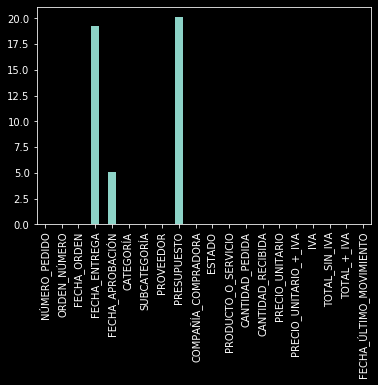

In [542]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

FECHA_ENTREGA AND FECHA_APROBACIÓN

In [543]:
# df['FECHA_ENTREGA'] = df['FECHA_ENTREGA'].fillna(0)
# df['FECHA_ENTREGA'].head(2)

In [544]:
# df['FECHA_APROBACIÓN'] = df['FECHA_APROBACIÓN'].fillna(0)
# df['FECHA_APROBACIÓN'].head(2)

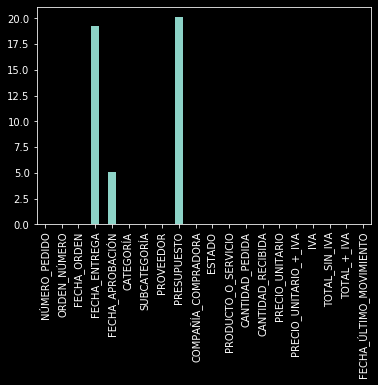

In [545]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

PRESUPUESTO

In [546]:
df.loc[df['PRESUPUESTO'].isna(), 'PRESUPUESTO'] = df['PRESUPUESTO'].mode()[0]

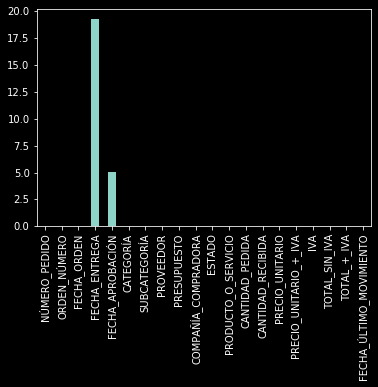

In [547]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

# 5. FEATURE ENGINEERING (NEW VARIABLES)

DURACIÓN_ENTREGA

In [548]:
df['DURACIÓN_ENTREGA'] = (df['FECHA_ENTREGA']-df['FECHA_ORDEN']).dt.components.days

DURACIÓN_APROBACIÓN

In [549]:
df['DURACIÓN_APROBACIÓN'] = (df['FECHA_APROBACIÓN']-df['FECHA_ORDEN']).dt.components.days

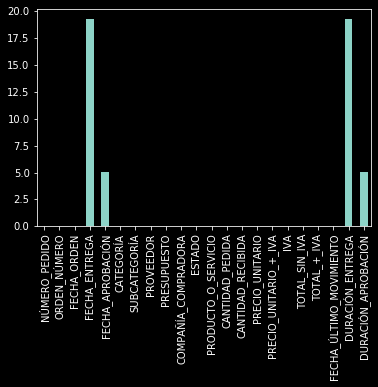

In [550]:
(df.isna().sum()/len(df)*100).plot(kind='bar')

FILL NA DURACIÓN_APROBACIÓN AND DURACIÓN_ENTREGA

In [551]:
df.loc[df['DURACIÓN_ENTREGA'].isna(), 'DURACIÓN_ENTREGA'] = df['DURACIÓN_ENTREGA'].mean()

In [552]:
df.loc[df['DURACIÓN_APROBACIÓN'].isna(), 'DURACIÓN_APROBACIÓN'] = df['DURACIÓN_APROBACIÓN'].mean()

Delete FECHA_ENTREGA AND FECHA_APROBACIÓN

In [553]:
cols_to_drop = ['FECHA_APROBACIÓN', 'FECHA_ORDEN', 'FECHA_ENTREGA']

In [554]:
df.drop(cols_to_drop, inplace=True, axis=1)

In [555]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'PRODUCTO_O_SERVICIO', 'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA',
       'PRECIO_UNITARIO', 'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_SIN_IVA',
       'TOTAL_+_IVA', 'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA',
       'DURACIÓN_APROBACIÓN'],
      dtype='object')

In [556]:
df.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,"35,120.86",708.25,196.68,49.52,"74,073.20","85,578.17","11,499.70","477,558.03","552,286.12",3.24,13.37
std,"17,747.16",653.97,"1,976.19",880.83,"644,253.06","736,123.81","104,931.32","3,160,620.25","3,583,836.25",15.02,27.30
min,1.00,1.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,-323.00,0.00
25%,"32,384.00",172.00,2.00,0.00,"1,861.00","2,100.00",93.00,"29,412.00","33,911.25",0.00,0.00
50%,"45,515.50",491.00,7.00,2.00,"11,400.00","13,000.00","1,040.00","90,756.00","104,697.00",1.00,0.00
75%,"47,418.25","1,142.00",40.00,10.00,"32,222.00","37,970.75","5,588.00","294,118.00","337,949.00",3.24,13.37
max,"49,561.00","3,650.00","120,000.00","53,620.00","33,242,814.00","39,558,948.00","6,316,135.00","299,185,312.00","356,030,528.00",307.00,573.00


In [557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22392 entries, 0 to 23082
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   NÚMERO_PEDIDO            22392 non-null  int32         
 1   ORDEN_NÚMERO             22392 non-null  int32         
 2   CATEGORÍA                22392 non-null  object        
 3   SUBCATEGORÍA             22392 non-null  object        
 4   PROVEEDOR                22392 non-null  object        
 5   PRESUPUESTO              22392 non-null  object        
 6   COMPAÑÍA_COMPRADORA      22392 non-null  object        
 7   ESTADO                   22392 non-null  object        
 8   PRODUCTO_O_SERVICIO      22392 non-null  object        
 9   CANTIDAD_PEDIDA          22392 non-null  float64       
 10  CANTIDAD_RECIBIDA        22392 non-null  float64       
 11  PRECIO_UNITARIO          22392 non-null  float32       
 12  PRECIO_UNITARIO_+_IVA    22392 n

## SUMARIZE CATEGORICAL VARIABLES

In [558]:
df.select_dtypes(['object', 'category']).columns

Index(['CATEGORÍA', 'SUBCATEGORÍA', 'PROVEEDOR', 'PRESUPUESTO',
       'COMPAÑÍA_COMPRADORA', 'ESTADO', 'PRODUCTO_O_SERVICIO'],
      dtype='object')

### Top CATEGORIA

In [559]:
categoría =df['CATEGORÍA'].value_counts()/len(df)*100
categoría

Alimentos y Bebidas                                          30.98
Vigilancia y seguridad industrial                            27.01
Aseo, Cafetería y Oficina                                    17.14
Dotación y elementos de protección personal                   5.35
Ferreteria                                                    3.53
Almacenamiento y empaques                                     2.06
Vehículos y repuestos                                         1.64
Químicos y derivados                                          1.60
Construcción y Mantenimiento                                  1.30
Servicios Profesionales                                       1.10
Mercadeo y publicidad                                         0.95
Manufactura                                                   0.92
Logística y transporte                                        0.84
Eléctricos y Electrónicos                                     0.76
Mobiliario y decoración                                       

In [560]:
top_categoria = categoría[:7].index

In [561]:
df.loc[~df['CATEGORÍA'].isin(top_categoria), 'CATEGORÍA'] = 'Otros'

In [562]:
df['CATEGORÍA'].value_counts()

Alimentos y Bebidas                            6938
Vigilancia y seguridad industrial              6049
Aseo, Cafetería y Oficina                      3838
Otros                                          2749
Dotación y elementos de protección personal    1199
Ferreteria                                      790
Almacenamiento y empaques                       462
Vehículos y repuestos                           367
Name: CATEGORÍA, dtype: int64

### Top  SUBCATEGORÍA

In [563]:
df['SUBCATEGORÍA'].value_counts()/len(df)*100

Seguridad y protección personal                                  27.00
Alimentos preparados y conservados                               10.01
Elementos de aseo y limpieza                                      8.92
Elementos de papelería                                            7.23
Bebidas                                                           5.93
                                                          ...         
Calefacción, ventilación y circulación del aire                   0.00
Carrocerías y remolques                                           0.00
Piezas fundidas maquinadas                                        0.00
Generación de energía                                             0.00
Medios impresos                                                   0.00
Name: SUBCATEGORÍA, Length: 149, dtype: float64

In [564]:
TOP_SUBCATEGORÍA = (df['SUBCATEGORÍA'].value_counts()/len(df)*100)[:3].index
TOP_SUBCATEGORÍA

Index(['Seguridad y protección personal', 'Alimentos preparados y conservados',
       'Elementos de aseo y limpieza'],
      dtype='object')

In [565]:
df.loc[~df['SUBCATEGORÍA'].isin(TOP_SUBCATEGORÍA), 'SUBCATEGORÍA'] =  'Otros'

In [566]:
df['SUBCATEGORÍA'].value_counts()/len(df)*100

Otros                                               54.08
Seguridad y protección personal                     27.00
Alimentos preparados y conservados                  10.01
Elementos de aseo y limpieza                         8.92
Name: SUBCATEGORÍA, dtype: float64

### Top PROVEEDOR

In [567]:
df['PROVEEDOR'].value_counts()/len(df)*100

Proveedor 301                  24.29
Proveedor 59                    6.93
Proveedor 28                    6.34
Proveedor 26                    5.43
Proveedor 321                   4.33
                        ...         
Proveedor 312                   0.00
Proveedor 69                    0.00
Proveedor 259                   0.00
Proveedor 174                   0.00
Proveedor 404                   0.00
Name: PROVEEDOR, Length: 405, dtype: float64

In [568]:
TOP_PROVEEDOR= (df['PROVEEDOR'].value_counts()/len(df)*100)[:3].index
TOP_PROVEEDOR

Index(['Proveedor 301', 'Proveedor 59', 'Proveedor 28'], dtype='object')

In [569]:
df.loc[~df['PROVEEDOR'].isin(TOP_PROVEEDOR), 'PROVEEDOR'] =  'Otros'

In [570]:
df['PROVEEDOR'].value_counts()/len(df)*100

Otros                          62.44
Proveedor 301                  24.29
Proveedor 59                    6.93
Proveedor 28                    6.34
Name: PROVEEDOR, dtype: float64

### Top PRESUPUESTO

In [571]:
def add_otros(variable, top_list):
    df.loc[~df[variable].isin(top_list), variable] =  'Otros'
    print(df[variable].value_counts()/len(df)*100)

In [572]:
df['PRESUPUESTO'].value_counts()/len(df)*100

Presupuesto 711                  34.98
Presupuesto 719                   8.17
Presupuesto 330                   1.53
Presupuesto 395                   0.91
Presupuesto 286                   0.83
                          ...         
Presupuesto 530                   0.00
Presupuesto 29                    0.00
Presupuesto 362                   0.00
Presupuesto 523                   0.00
Presupuesto 391                   0.00
Name: PRESUPUESTO, Length: 921, dtype: float64

In [573]:
TOP_PRESUPUESTO= (df['PRESUPUESTO'].value_counts()/len(df)*100)[:2].index
TOP_PRESUPUESTO

Index(['Presupuesto 711', 'Presupuesto 719'], dtype='object')

In [574]:
add_otros('PRESUPUESTO', TOP_PRESUPUESTO)

Otros                            56.85
Presupuesto 711                  34.98
Presupuesto 719                   8.17
Name: PRESUPUESTO, dtype: float64


In [575]:
df['PRESUPUESTO'].value_counts()/len(df)*100

Otros                            56.85
Presupuesto 711                  34.98
Presupuesto 719                   8.17
Name: PRESUPUESTO, dtype: float64

### Top COMPAÑÍA_COMPRADORA

In [576]:
df['COMPAÑÍA_COMPRADORA'].value_counts()/len(df)*100

Portal comprador 1                   29.31
Portal comprador 24                  24.29
Portal comprador 2                   17.25
Portal comprador 29                  14.83
Portal comprador 6                    3.80
Portal comprador 30                   3.39
Portal comprador 4                    1.61
Portal comprador 8                    1.42
Portal comprador 5                    1.32
Portal comprador 12                   0.96
Portal comprador 18                   0.40
Portal comprador 10                   0.31
Portal comprador 7                    0.29
Portal comprador 11                   0.23
Portal comprador 27                   0.16
Portal comprador 13                   0.15
Portal comprador 20                   0.13
Portal comprador 31                   0.07
Portal comprador 21                   0.02
Portal comprador 32                   0.01
Portal comprador 28                   0.01
Portal comprador 26                   0.01
Portal comprador 14                   0.01
Portal comp

In [577]:
TOP_COMPAÑIA_COMPRADORA = (df['COMPAÑÍA_COMPRADORA'].value_counts()/len(df)*100)[:4].index
TOP_COMPAÑIA_COMPRADORA

Index(['Portal comprador 1', 'Portal comprador 24', 'Portal comprador 2',
       'Portal comprador 29'],
      dtype='object')

In [578]:
add_otros('COMPAÑÍA_COMPRADORA', TOP_COMPAÑIA_COMPRADORA)

Portal comprador 1                   29.31
Portal comprador 24                  24.29
Portal comprador 2                   17.25
Portal comprador 29                  14.83
Otros                                14.32
Name: COMPAÑÍA_COMPRADORA, dtype: float64


In [579]:
df['COMPAÑÍA_COMPRADORA'].value_counts()

Portal comprador 1     6563
Portal comprador 24    5439
Portal comprador 2     3863
Portal comprador 29    3320
Otros                  3207
Name: COMPAÑÍA_COMPRADORA, dtype: int64

### Top PRODUCTO_O_SERVICIO (try to avoid this varaible on the dataset)

In [580]:
df.drop('PRODUCTO_O_SERVICIO', axis=1, inplace=True)

# 6. CORRELATION ANALYSIS

In [581]:
df.corr()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
NÚMERO_PEDIDO,1.00,0.45,-0.12,0.03,0.06,0.06,0.05,0.03,0.03,0.04,-0.01
ORDEN_NÚMERO,0.45,1.00,-0.03,0.03,0.09,0.09,0.09,0.01,0.01,-0.04,-0.18
CANTIDAD_PEDIDA,-0.12,-0.03,1.00,0.44,-0.01,-0.01,-0.01,0.02,0.02,-0.00,-0.04
CANTIDAD_RECIBIDA,0.03,0.03,0.44,1.00,-0.01,-0.01,-0.01,0.04,0.04,-0.01,-0.01
PRECIO_UNITARIO,0.06,0.09,-0.01,-0.01,1.00,1.00,0.86,0.61,0.60,0.14,-0.03
PRECIO_UNITARIO_+_IVA,0.06,0.09,-0.01,-0.01,1.00,1.00,0.89,0.59,0.59,0.13,-0.02
IVA,0.05,0.09,-0.01,-0.01,0.86,0.89,1.00,0.45,0.48,0.10,-0.02
TOTAL_SIN_IVA,0.03,0.01,0.02,0.04,0.61,0.59,0.45,1.00,1.00,0.22,0.04
TOTAL_+_IVA,0.03,0.01,0.02,0.04,0.60,0.59,0.48,1.00,1.00,0.22,0.04
DURACIÓN_ENTREGA,0.04,-0.04,-0.00,-0.01,0.14,0.13,0.10,0.22,0.22,1.00,-0.07


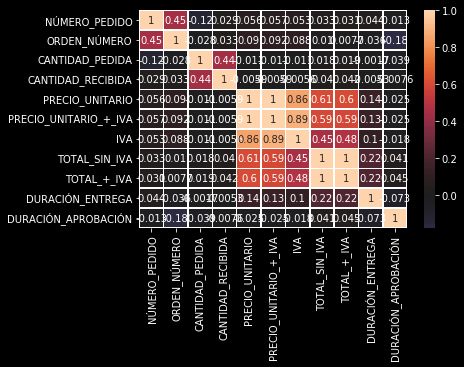

In [582]:

sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5)

In [583]:
df.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_SIN_IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,"35,120.86",708.25,196.68,49.52,"74,073.20","85,578.17","11,499.70","477,558.03","552,286.12",3.24,13.37
std,"17,747.16",653.97,"1,976.19",880.83,"644,253.06","736,123.81","104,931.32","3,160,620.25","3,583,836.25",15.02,27.30
min,1.00,1.00,0.27,0.00,0.00,0.00,0.00,0.00,0.00,-323.00,0.00
25%,"32,384.00",172.00,2.00,0.00,"1,861.00","2,100.00",93.00,"29,412.00","33,911.25",0.00,0.00
50%,"45,515.50",491.00,7.00,2.00,"11,400.00","13,000.00","1,040.00","90,756.00","104,697.00",1.00,0.00
75%,"47,418.25","1,142.00",40.00,10.00,"32,222.00","37,970.75","5,588.00","294,118.00","337,949.00",3.24,13.37
max,"49,561.00","3,650.00","120,000.00","53,620.00","33,242,814.00","39,558,948.00","6,316,135.00","299,185,312.00","356,030,528.00",307.00,573.00


Delete 'TOTAL_SIN_IVA'

In [584]:
df.drop('TOTAL_SIN_IVA', axis=1, inplace=True)

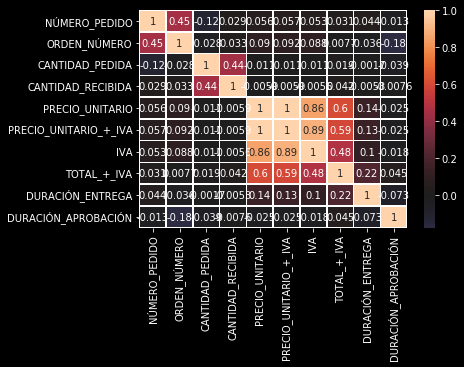

In [585]:
sns.heatmap(df.corr(), center=0, annot=True, linewidths=.5)

In [586]:
df.columns

Index(['NÚMERO_PEDIDO', 'ORDEN_NÚMERO', 'CATEGORÍA', 'SUBCATEGORÍA',
       'PROVEEDOR', 'PRESUPUESTO', 'COMPAÑÍA_COMPRADORA', 'ESTADO',
       'CANTIDAD_PEDIDA', 'CANTIDAD_RECIBIDA', 'PRECIO_UNITARIO',
       'PRECIO_UNITARIO_+_IVA', 'IVA', 'TOTAL_+_IVA',
       'FECHA_ÚLTIMO_MOVIMIENTO', 'DURACIÓN_ENTREGA', 'DURACIÓN_APROBACIÓN'],
      dtype='object')

In [587]:
df.head(2)

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,FECHA_ÚLTIMO_MOVIMIENTO,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,49561,2582,Otros,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso,2.00,0.00,"23,364.00","27,803.00",4439,"55,606.00",2021-11-10,0.00,0.00
1,49560,2581,Otros,Otros,Otros,Otros,Portal comprador 1,Recibido,1.00,1.00,"1,476,972.00","1,757,597.00",280625,"1,757,597.00",2021-11-10,1.00,0.00


In [588]:
df.to_excel('Proveindustriales_completo.xlsx', index=False)

# 8. TRANSFORMATION

In [589]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer

## Numeric to Normalized values

In [590]:
df_numeric = df.select_dtypes(['int32', 'int64', 'float32', 'float64'])
df_numeric

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,49561,2582,2.00,0.00,"23,364.00","27,803.00",4439,"55,606.00",0.00,0.00
1,49560,2581,1.00,1.00,"1,476,972.00","1,757,597.00",280625,"1,757,597.00",1.00,0.00
2,49559,2580,10.00,0.00,"15,500.00","15,500.00",0,"155,000.00",0.00,0.00
3,49558,1892,50.00,0.00,"22,000.00","22,000.00",0,"1,100,000.00",2.00,0.00
4,49557,1,7.00,7.00,"92,084.00","109,580.00",17496,"767,060.00",-1.00,0.00
...,...,...,...,...,...,...,...,...,...,...
23078,2,2,8.00,8.00,"33,613.00","40,000.00",6387,"320,000.00",3.24,1.00
23079,2,2,1.00,1.00,588.00,700.00,112,700.00,3.24,1.00
23080,2,2,3.00,3.00,"29,412.00","35,000.00",5588,"105,000.00",3.24,1.00
23081,1,1,4.00,4.00,"29,412.00","35,000.00",5588,"140,000.00",3.24,0.00


In [591]:
df_numeric.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,"35,120.86",708.25,196.68,49.52,"74,073.20","85,578.17","11,499.70","552,286.12",3.24,13.37
std,"17,747.16",653.97,"1,976.19",880.83,"644,253.06","736,123.81","104,931.32","3,583,836.25",15.02,27.30
min,1.00,1.00,0.27,0.00,0.00,0.00,0.00,0.00,-323.00,0.00
25%,"32,384.00",172.00,2.00,0.00,"1,861.00","2,100.00",93.00,"33,911.25",0.00,0.00
50%,"45,515.50",491.00,7.00,2.00,"11,400.00","13,000.00","1,040.00","104,697.00",1.00,0.00
75%,"47,418.25","1,142.00",40.00,10.00,"32,222.00","37,970.75","5,588.00","337,949.00",3.24,13.37
max,"49,561.00","3,650.00","120,000.00","53,620.00","33,242,814.00","39,558,948.00","6,316,135.00","356,030,528.00",307.00,573.00


In [592]:
normalizer = Normalizer()
df_numeric_normalized = pd.DataFrame(normalizer.fit_transform(df_numeric), columns=df_numeric.columns)


In [593]:
df_numeric_normalized.describe()

,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,"22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00","22,392.00"
mean,0.35,0.01,0.00,0.00,0.14,0.16,0.02,0.75,0.00,0.00
std,0.36,0.02,0.01,0.00,0.16,0.18,0.03,0.30,0.00,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00
25%,0.03,0.00,0.00,0.00,0.02,0.02,0.00,0.56,0.00,0.00
50%,0.19,0.00,0.00,0.00,0.07,0.08,0.01,0.91,0.00,0.00
75%,0.65,0.01,0.00,0.00,0.20,0.24,0.03,1.00,0.00,0.00
max,1.00,0.59,0.32,0.18,0.60,0.71,0.11,1.00,0.06,0.60


## Categorical to OneHotEncoder

Drop PRODUCTO_O_SERVICIO Delete. if you want to try, delete PRODUCTO_O_SERVICIO too (it has a lot of categories)

In [594]:
df_categorical = df.select_dtypes(['object'])
df_categorical = df_categorical.loc[:, df_categorical.columns != 'PRODUCTO_O_SERVICIO']
df_categorical.head(3)

,CATEGORÍA,SUBCATEGORÍA,PROVEEDOR,PRESUPUESTO,COMPAÑÍA_COMPRADORA,ESTADO
0,Otros,Otros,Otros,Otros,Portal comprador 1,Orden en Proceso
1,Otros,Otros,Otros,Otros,Portal comprador 1,Recibido
2,Alimentos y Bebidas,Alimentos preparados y conservados,Otros,Otros,Portal comprador 1,Orden en Proceso


In [595]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_Cols = pd.DataFrame(OH_encoder.fit_transform(df_categorical))

In [596]:
OH_Cols.columns =  OH_encoder.get_feature_names(df_categorical.columns)

In [597]:
pd.options.display.float_format = '{:,.7f}'.format

In [598]:
OH_Cols

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial
0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000
1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
2,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000
3,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000
4,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
22388,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
22389,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000
22390,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000

# CONCAT ONEHOTENCODER WITH NORMALIZED

In [599]:
df_num_encoder_normalized = pd.concat([OH_Cols, df_numeric_normalized], axis=1)
df_num_encoder_normalized

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
0,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.5969223,0.0310981,0.0000241,0.0000000,0.2814006,0.3348647,0.0534642,0.6697295,0.0000000,0.0000000
1,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0170583,0.0008884,0.0000003,0.0000003,0.5083660,0.6049556,0.0965897,0.6049556,0.0000003,0.0000000
2,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.3017840,0.0157106,0.0000609,0.0000000,0.0943855,0.0943855,0.0000000,0.9438551,0.0000000,0.0000000
3,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0449891,0.0017176,0.0000454,0.0000000,0.0199717,0.0199717,0.0000000,0.9985866,0.0000018,0.0000000
4,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0633666,0.0000013,0.0000090,0.0000090,0.1177442,0.1401157,0.0223715,0.9808099,-0.0000013,0.0000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22387,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000062,0.0000062,0.0000247,0.0000247,0.1036478,0.1233425,0.0196947,0.9867400,0.0000100,0.0000031
22388,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.000000

In [600]:
df_num_encoder_normalized.describe()

,CATEGORÍA_Alimentos y Bebidas,CATEGORÍA_Almacenamiento y empaques,"CATEGORÍA_Aseo, Cafetería y Oficina",CATEGORÍA_Dotación y elementos de protección personal,CATEGORÍA_Ferreteria,CATEGORÍA_Otros,CATEGORÍA_Vehículos y repuestos,CATEGORÍA_Vigilancia y seguridad industrial,SUBCATEGORÍA_Alimentos preparados y conservados,SUBCATEGORÍA_Elementos de aseo y limpieza,SUBCATEGORÍA_Otros,SUBCATEGORÍA_Seguridad y protección personal,PROVEEDOR_Otros,PROVEEDOR_Proveedor 28,PROVEEDOR_Proveedor 301,PROVEEDOR_Proveedor 59,PRESUPUESTO_Otros,PRESUPUESTO_Presupuesto 711,PRESUPUESTO_Presupuesto 719,COMPAÑÍA_COMPRADORA_Otros,COMPAÑÍA_COMPRADORA_Portal comprador 1,COMPAÑÍA_COMPRADORA_Portal comprador 2,COMPAÑÍA_COMPRADORA_Portal comprador 24,COMPAÑÍA_COMPRADORA_Portal comprador 29,ESTADO_Cancelado,ESTADO_Enviado,ESTADO_Finalizado Incompleto,ESTADO_Orden Confirmada,ESTADO_Orden Rechazada,ESTADO_Orden en Proceso,ESTADO_Pendiente por Aprobar,ESTADO_Recibido,ESTADO_Recibido Parcial,NÚMERO_PEDIDO,ORDEN_NÚMERO,CANTIDAD_PEDIDA,CANTIDAD_RECIBIDA,PRECIO_UNITARIO,PRECIO_UNITARIO_+_IVA,IVA,TOTAL_+_IVA,DURACIÓN_ENTREGA,DURACIÓN_APROBACIÓN
count,"22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000","22,392.0000000"
mean,0.3098428,0.0206324,0.1714005,0.0535459,0.0352805,0.1227671,0.0163898,0.2701411,0.1000804,0.0891836,0.5407735,0.2699625,0.6244194,0.0633708,0.2428992,0.0693105,0.5685066,0.3498124,0.0816810,0.1432208,0.2930957,0.1725170,0.2428992,0.1482672,0.0508664,0.0005359,0.0418006,0.0006699,0.0451947,0.2175777,0.0022776,0.6337978,0.0072794,0.3456019,0.0085065,0.0009658,0.0001459,0.1390195,0.1597082,0.0206887,0.7460593,0.0000579,0.0003057
std,0.4624390,0.1421534,0.3768670,0.2251244,0.1844919,0.3281770,0.1269720,0.4440425,0.3001139,0.2850150,0.4983459,0.4439499,0.4842833,0.2436342,0.4288443,0.2539870,0.4952957,0.4769212,0.2738842,0.3503057,0.4551921,0.3778376,0.4288443,0.3553726,0.2197297,0.0231439,0.2001378,0.0258740,0.2077356,0.4126079,0.0476709,0.4817764,0.0850101,0.3566653,0.0189511,0.0099755,0.0023884,0.1581804,0.1811378,0.0279694,0.3037501,0.0005832,0.0089191
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000026,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-0.0063936,0.0000000
25%,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0286261,0.0006299,0.0000188,0.0000000,0.0171180,0.0199722,0.0008264,0.5581244,0.0000000,0.0000000
50%,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.1859662,0.0029115,0.0000423,0.0000140,0.0695481,0.0815616,0.007195

# SAVE TO CSV

In [601]:
df.to_csv('Proveindustriales_Data_Cleaned_csv2.csv', index=False)

In [602]:
df_num_encoder_normalized.to_csv('Proveindustriales_Data_Cleaned_numeric_onehot_csv.csv', index=False)